In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Cargar archivo
df = pd.read_csv('walmart-sales.csv')
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [3]:
#Checking Dataset Description
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [4]:
# Convertir la columna 'Date' a datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
df = df.groupby(df.index).sum() # Sumamos los valores de los índices duplicados
df = df.sort_index() # Ordenamos los índices

In [5]:
# Se selecciona la serie de tiempo
timeseries = df['Weekly_Sales']

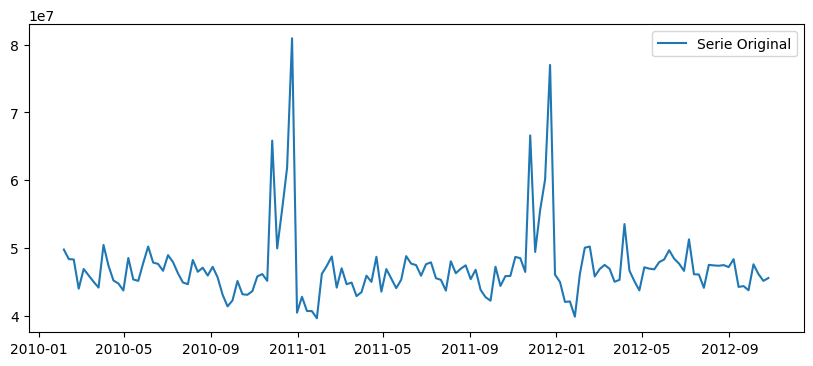

In [6]:
# Grafica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(timeseries, label='Serie Original')
plt.legend()

plt.show()

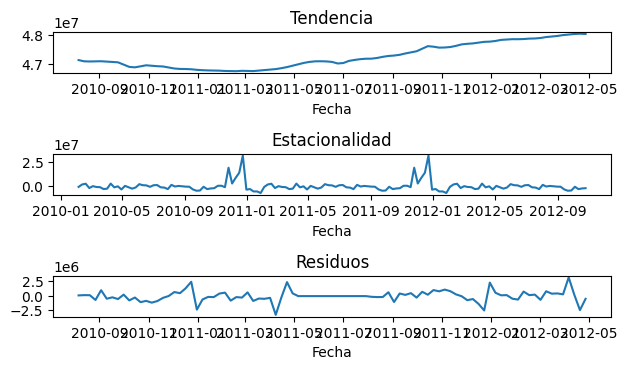

In [7]:
descomposition = seasonal_decompose(timeseries, model='additive')

# Gráfica de la descomposición

#Gráfica de la tendencia
plt.subplot(412)
plt.plot(descomposition.trend, label='Tendencia')
plt.title('Tendencia')
plt.xlabel('Fecha')

#Gráfica de la estacionalidad
plt.subplot(413)
plt.plot(descomposition.seasonal, label='Estacionalidad')
plt.title('Estacionalidad')
plt.xlabel('Fecha')

#Gráfica de los residuos
plt.subplot(414)
plt.plot(descomposition.resid, label='Residuos')
plt.title('Residuos')
plt.xlabel('Fecha')

plt.tight_layout()
plt.show()

In [8]:
# Definir el punto de división
split_date = '2011-09-01'

# Dividir la serie de tiempo en entrenamiento y prueba
train = timeseries[:split_date]
test = timeseries[split_date:]

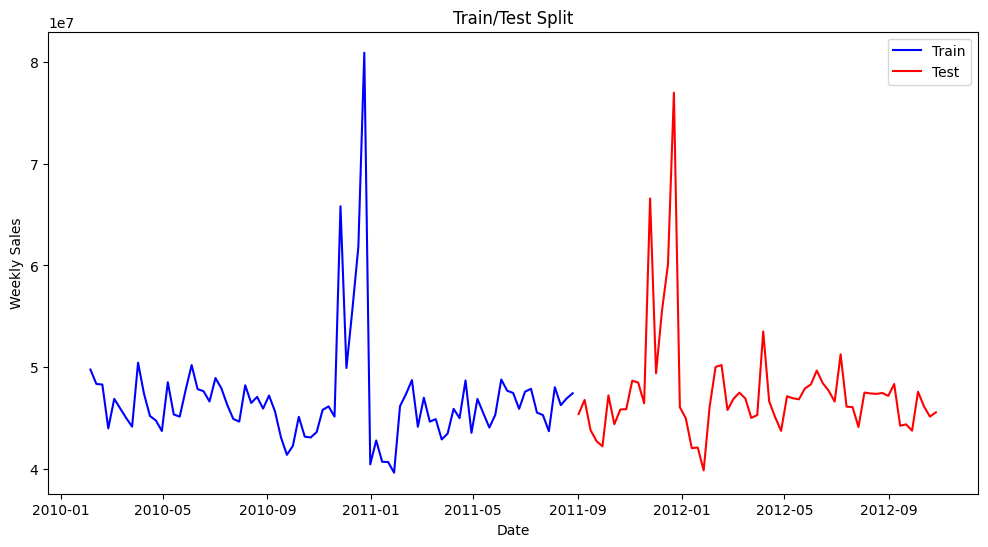

In [9]:
#Ver los datos de entrenamiento y prueba
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='red')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


In [10]:
from statsmodels.tsa.arima.model import ARIMA
# Ajustar el modelo ARIMA
model = ARIMA(train, order=(10, 1, 10))
model_fit = model.fit()
# Realizar el pronóstico
forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

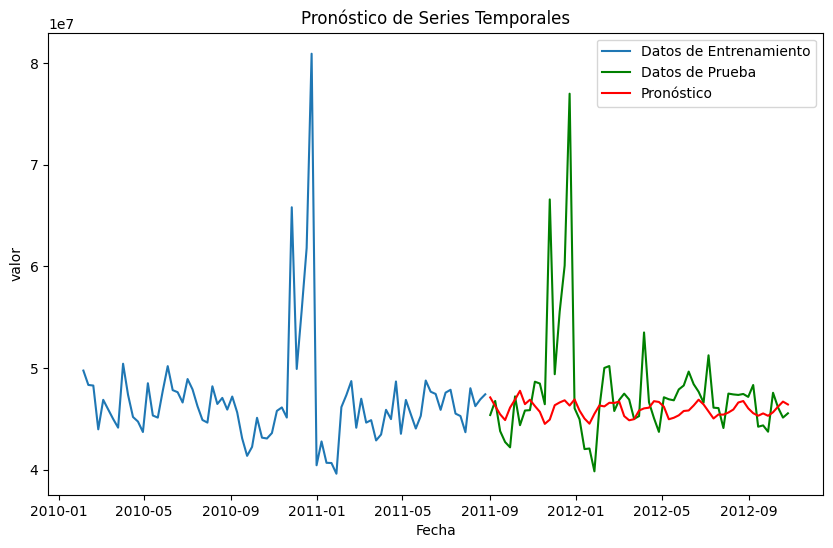

In [11]:
# Grafica de los datos originales y el pronóstico
plt.figure(figsize=(10, 6))

plt.plot(train, label='Datos de Entrenamiento')
plt.plot(test, label='Datos de Prueba', color='green')
plt.plot(test.index, forecast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('valor')
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test, forecast)
print('Error Absoluto Medio (MAE):', mae)

Error Absoluto Medio (MAE): 2966218.258714335


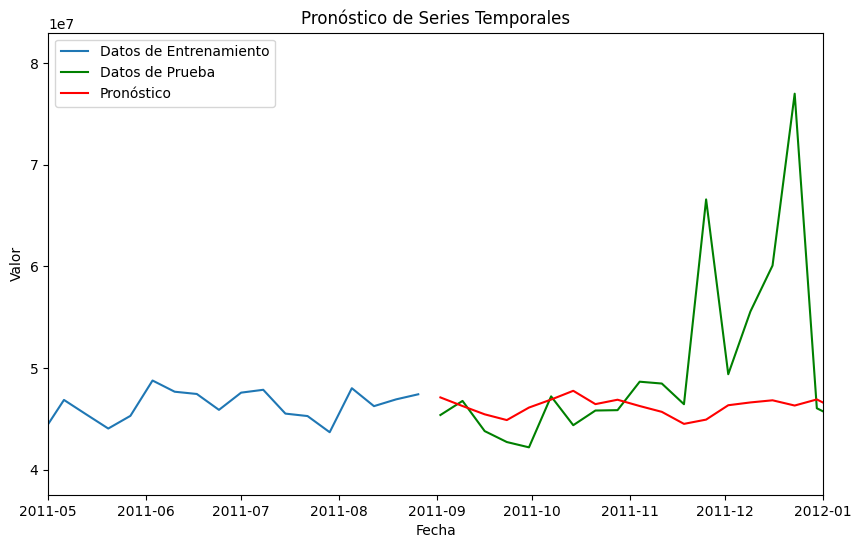

In [15]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.plot(train, label='Datos de Entrenamiento')
plt.plot(test, label='Datos de Prueba', color='green')
plt.plot(test.index, forecast, label='Pronóstico', color='red')

# Ajustar los límites del eje x para hacer zoom
fecha_inicio = pd.to_datetime('2011-05-01')
fecha_fin = pd.to_datetime('2012-01-01')
plt.xlim(fecha_inicio,fecha_fin)

plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

Longitud de train_data: 82
Longitud de errors: 61


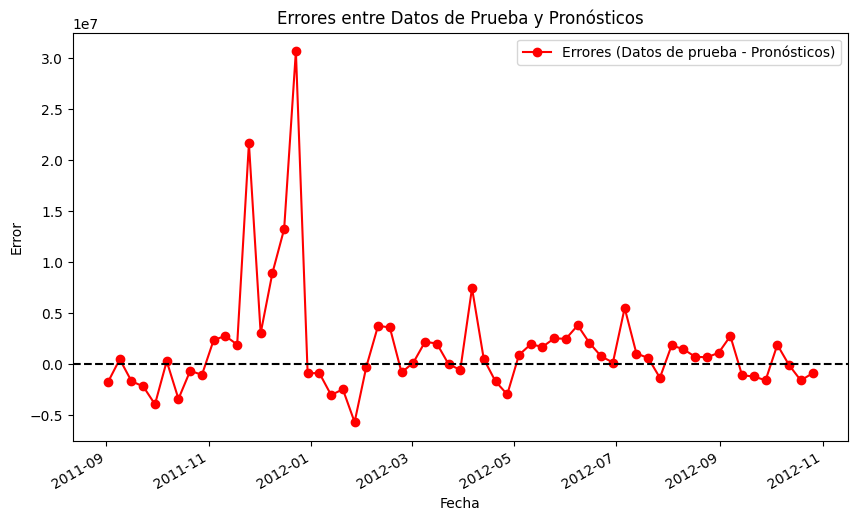

In [16]:
# Calcular los errores (residuales) entre los datos reales y los pronósticos
errors = test - forecast

print(f"Longitud de train_data: {len(train)}")
print(f"Longitud de errors: {len(errors)}")

# Asegúrando que train_data y errors tengan la misma longitud
min_length = min(len(test), len(errors))
train_data = test[:min_length]
errors = errors[:min_length]

# Graficar los errores
plt.figure(figsize=(10, 6))
plt.plot(test.index, errors, marker='o', linestyle='-', color='red', label='Errores (Datos de prueba - Pronósticos)')

# Añadir títulos y etiquetas
plt.title('Errores entre Datos de Prueba y Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.axhline(y=0, color='black', linestyle='--')  # Línea horizontal en y=0 para referencia
plt.legend()

# Rotar las etiquetas de las fechas si es necesario
plt.gcf().autofmt_xdate()

# Mostrar la gráfica
plt.show()

# Mostrar la gráfica
plt.show()